<a href="https://colab.research.google.com/github/Asjad-Naqvi/Penguin_classification_using_tensorflow/blob/main/Penguin_classification_TensorFLow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_decision_forests

In [30]:
import seaborn as sns
import pandas as pd
import tensorflow_decision_forests as tfdf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
data =  sns.load_dataset("penguins")

In [6]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [11]:
data.dropna(inplace = True)

In [12]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [16]:
categorical_coloumns = data.select_dtypes(include = ["object" , "category"]).columns

In [21]:
numerical_coloumns = data.select_dtypes(include = ["float64" , "int"]).columns

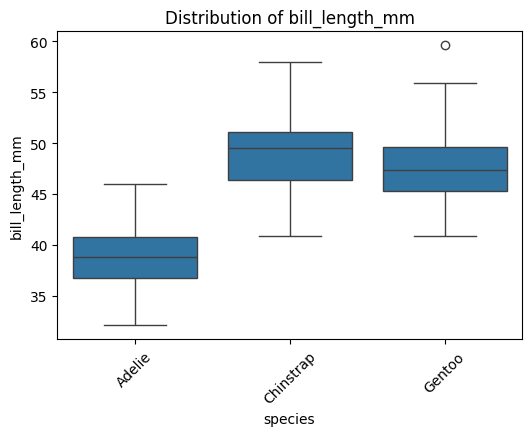

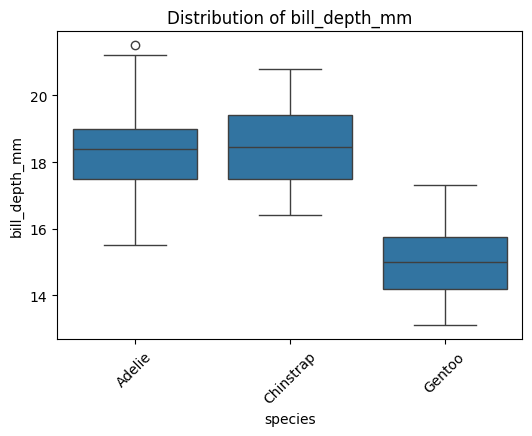

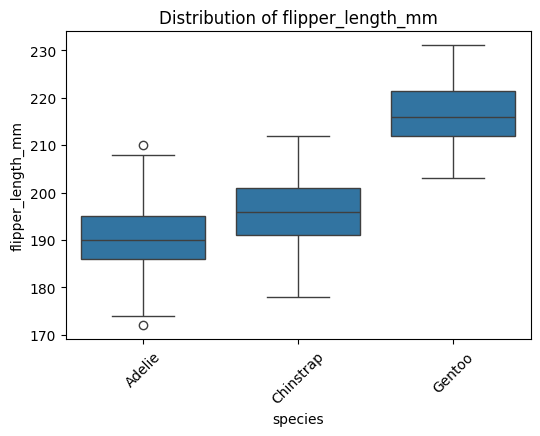

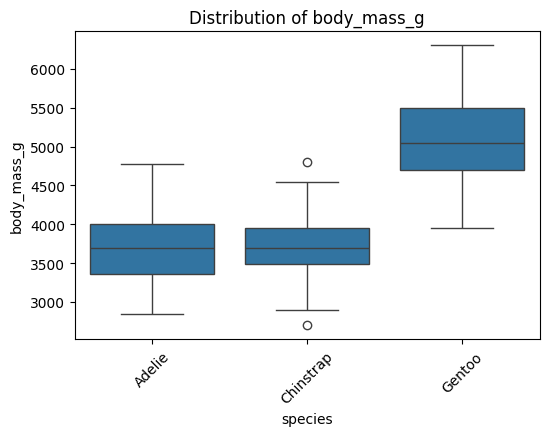

In [25]:
# to visulize the distribution of numerical for better understanding of the Data
for numcols in numerical_coloumns:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = 'species', y = numcols , data = data)
    plt.title(f'Distribution of {numcols}')
    plt.xlabel('species')
    plt.ylabel(numcols)
    plt.xticks(rotation = 45)
    plt.show()


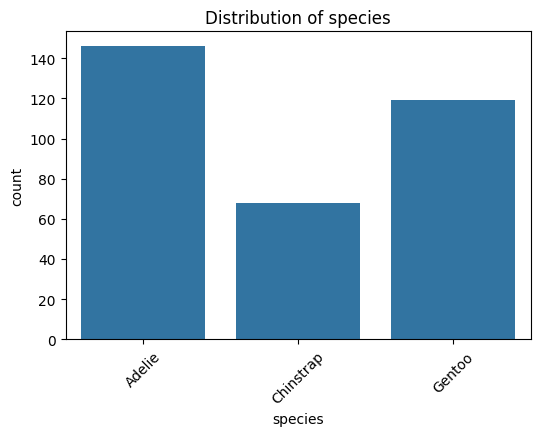

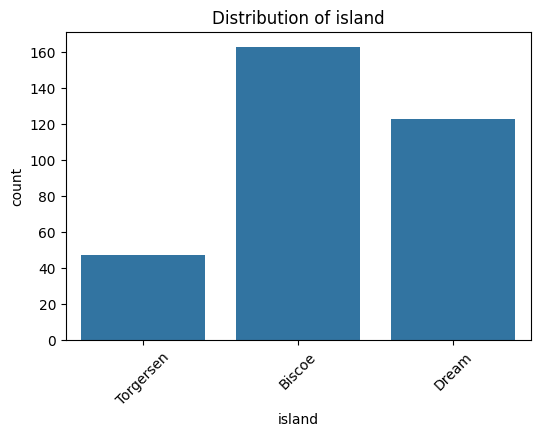

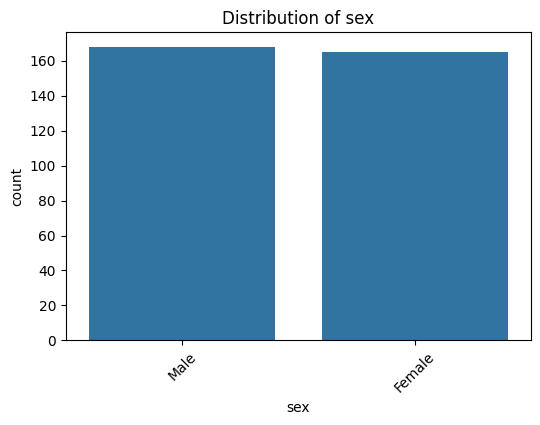

In [26]:
# to visulize the distribution of categories for better understanding of the Data
for cols in categorical_coloumns:
    plt.figure(figsize = (6,4))
    sns.countplot(data = data  , x = cols)
    plt.title(f'Distribution of {cols}')
    plt.xticks(rotation = 45)
    plt.show()

In [31]:
# create seprate Label Encoders for each categorical variable
species_encoder = LabelEncoder()
island_encoder = LabelEncoder()
sex_encoder = LabelEncoder()

# Encode each categorical variable
data['species'] = species_encoder.fit_transform(data['species'])
data['island'] = island_encoder.fit_transform(data['island'])
data['sex'] = sex_encoder.fit_transform(data['sex'])

# saving mappings for future reference
species_mapping = dict(zip(species_encoder.classes_, species_encoder.transform(species_encoder.classes_)))
island_mapping = dict(zip(island_encoder.classes_, island_encoder.transform(island_encoder.classes_)))
sex_mapping = dict(zip(sex_encoder.classes_, sex_encoder.transform(sex_encoder.classes_)))



In [32]:
#split data into training and testing
train_data , test_data = train_test_split(data , test_size = 0.3 , random_state = 42)

# convert to tensorflow datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data , label = "species")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data , label = "species")

# create and train the randomfores model
model = tfdf.keras.RandomForestModel()
model.fit(train_ds, verbose = 2)




Use /tmp/tmp7pg0z2s1 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'island': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'bill_length_mm': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'bill_depth_mm': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'flipper_length_mm': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'body_mass_g': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>}
Label: Tensor("data_6:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'island': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'bill_length_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'bill_depth_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'flipper_length_mm':

I0000 00:00:1752495323.019193     766 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1752495323.019361     766 kernel.cc:783] Collect training examples
I0000 00:00:1752495323.019383     766 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1752495323.020098     766 kernel.cc:401] Number of batches: 1
I0000 00:00:1752495323.020139     766 kernel.cc:402] Number of examples: 233
I0000 00:00:1752495323.020204     766 kernel.cc:802] Training dataset:
Number of records: 233
Number of columns: 7

Number of columns by type:
	NUMERICAL: 6 (85.7143%)
	CATEGORICAL: 1 (14.2857%)

Columns:

NUMERICAL: 6 (85.7143%)
	1: "bill_depth_mm" NUMERICAL m

Model trained in 0:00:00.155372
Compiling model...
Model compiled.


In [37]:
# get an inspector to access model internals
inspector = model.make_inspector()

# display feature importances
importances_types = inspector.variable_importances().keys()

for importance_type in importances_types:
   print("\n" + "n" * 30)
   print(f"Importance type: {importance_type}")
   print("-" * 30)
   importances = inspector.variable_importances()[importance_type]
   sorted_imporatnces = sorted(importances , key=lambda x :x [1] , reverse=True)
   for feature, importance in sorted_imporatnces:
    feature_name = feature.name if isinstance(feature , tfdf.py_tree.dataspec.SimpleColumnSpec) else feature
    print(f"{feature_name:20}: {importance:4f}")




nnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
Importance type: INV_MEAN_MIN_DEPTH
------------------------------
bill_depth_mm       : 0.422665
bill_length_mm      : 0.411867
flipper_length_mm   : 0.373544
island              : 0.306037
body_mass_g         : 0.275918
sex                 : 0.245165

nnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
Importance type: NUM_AS_ROOT
------------------------------
bill_depth_mm       : 143.000000
flipper_length_mm   : 115.000000
bill_length_mm      : 41.000000
body_mass_g         : 1.000000

nnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
Importance type: SUM_SCORE
------------------------------
bill_length_mm      : 23859.060325
bill_depth_mm       : 21419.337791
flipper_length_mm   : 16734.752235
island              : 6425.724148
body_mass_g         : 2557.701044
sex                 : 303.636861

nnnnnnnnnnnnnnnnnnnnnnnnnnnnnn
Importance type: NUM_NODES
------------------------------
bill_length_mm      : 630.000000
bill_depth_mm       : 348.000000
body_mass_g         : 302.000000
flipper_l

In [39]:
test_predictions = model.predict(test_ds)
predicted_tables = np.argmax(test_predictions , axis = 1)
test_labels = test_data['species'].values

# computer accuracy
accuracy = accuracy_score(test_labels , predicted_tables)
print(f"Accuracy: {accuracy * 100:.2f}%")

#computer the confusion matrix
confusion = confusion_matrix(test_labels , predicted_tables)
print("\nConfusion Matrix:")
print(confusion)

# calculate and print classification report
classification_rep = classification_report(test_labels , predicted_tables, target_names=species_mapping.keys())
print("\nClassification Report:")
print(classification_rep)

1/1 [==============================] - 0s 40ms/step
Accuracy: 99.00%

Confusion Matrix:
[[48  0  0]
 [ 1 17  0]
 [ 0  0 34]]

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

